In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
url_cifar10 = URLs.CIFAR
url_cifar100 = URLs.CIFAR_100
url_database = url_cifar10

In [4]:
path = untar_data(url_database); path

PosixPath('/home/jupyter/.fastai/data/cifar10')

In [5]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/cifar10/labels.txt'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/test'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/models'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train')]

In [6]:
np.random.seed(42)

In [7]:
folder_path = path/'test'/'people'/'baby'
im = open_image(folder_path.ls()[0])
im.shape

FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter/.fastai/data/cifar10/test/people/baby'

In [8]:
data = ImageDataBunch.from_folder(path=path, 
                                  valid='test', 
                                  size=32, 
                                  bs=256).normalize(cifar_stats)

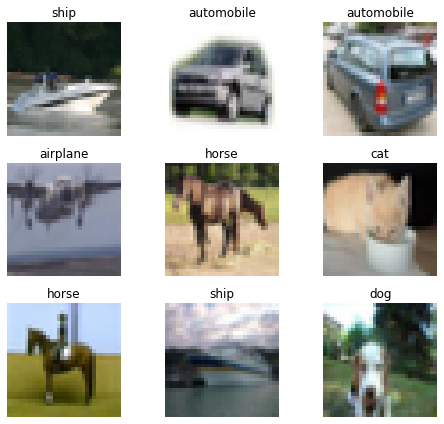

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
print(data.classes)
len(data.classes),data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

In [11]:
loss_func = nn.CrossEntropyLoss()
optimizer = partial(optim.SGD, momentum=0.9, dampening=0, weight_decay=0, nesterov=False)
learn = cnn_learner(data, models.vgg19_bn, loss_func=loss_func,metrics=accuracy, opt_func=optimizer, pretrained=False)
learn.unfreeze()
# learn = Learner(data, Mnist_NN(), loss_func=loss_func, metrics=accuracy)


In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


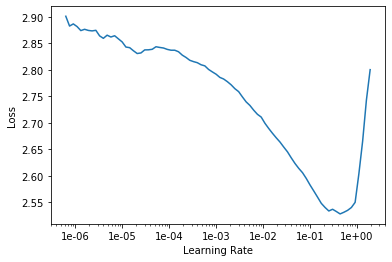

In [13]:
learn.recorder.plot()

In [14]:
learn.fit(epochs=10, lr=0.01)

epoch,train_loss,valid_loss,accuracy,time
0,1.459502,1.424487,0.519100,00:29
1,1.083573,1.123868,0.595900,00:29
2,0.852957,0.924369,0.675300,00:28
3,0.690736,0.889532,0.696200,00:29
4,0.569550,0.801857,0.727200,00:29
5,0.477258,0.916163,0.704300,00:29
6,0.389506,0.817791,0.734100,00:29
7,0.324733,0.967561,0.714600,00:29
8,0.252398,0.952630,0.729500,00:29
9,0.195467,1.006860,0.726400,00:29


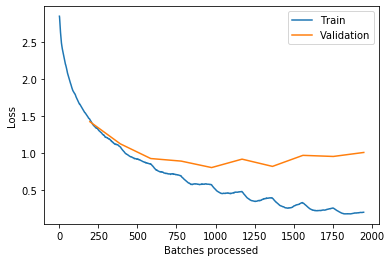

In [15]:
learn.recorder.plot_losses()

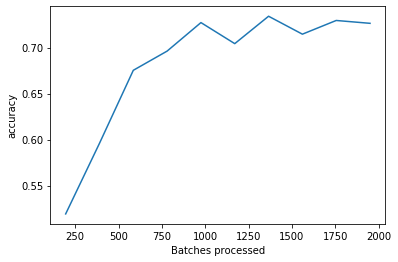

In [16]:
learn.recorder.plot_metrics()